# Proyecto: Prediccion de Divorcio

## Objetivo
Generar un modelo que pueda predecir el porcentaje que tiene una pareja de divorciarse en base a las respuestas que dieron a varias preguntas sobre su  funcionamiento y dinámica.

El dataset se puede obtener en https://www.kaggle.com/datasets/csafrit2/predicting-divorce?resource=download

Cada pareja rankea las preguntas del 0-4 siendo 1 el más bajo y 5 el mas alto

### Por Javier A. Martinez

# Descubrimiento de los datos

## Diccionario de dataset

1.	If one of us apologizes when our discussion deteriorates, the discussion ends.
2.	I know we can ignore our differences, even if things get hard sometimes.
3.	When we need it, we can take our discussions with my spouse from the beginning and correct it.
4.	When I discuss with my spouse, to contact him will eventually work.
5.	The time I spent with my wife is special for us.
6.	We don't have time at home as partners.
7.	We are like two strangers who share the same environment at home rather than family.
8.	I enjoy our holidays with my wife.
9.	I enjoy traveling with my wife.
10.	Most of our goals are common to my spouse.
11.	I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12.	My spouse and I have similar values in terms of personal freedom.
13.	My spouse and I have similar sense of entertainment.
14.	Most of our goals for people (children, friends, etc.) are the same.
15.	Our dreams with my spouse are similar and harmonious.
16.	We're compatible with my spouse about what love should be.
17.	We share the same views about being happy in our life with my spouse
18.	My spouse and I have similar ideas about how marriage should be
19.	My spouse and I have similar ideas about how roles should be in marriage
20.	My spouse and I have similar values in trust.
21.	I know exactly what my wife likes.
22.	I know how my spouse wants to be taken care of when she/he sick.
23.	I know my spouse's favorite food.
24.	I can tell you what kind of stress my spouse is facing in her/his life.
25.	I have knowledge of my spouse's inner world.
26.	I know my spouse's basic anxieties.
27.	I know what my spouse's current sources of stress are.
28.	I know my spouse's hopes and wishes.
29.	I know my spouse very well.
30.	I know my spouse's friends and their social relationships.
31.	I feel aggressive when I argue with my spouse.
32.	When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33.	I can use negative statements about my spouse's personality during our discussions.
34.	I can use offensive expressions during our discussions.
35.	I can insult my spouse during our discussions.
36.	I can be humiliating when we discussions.
37.	My discussion with my spouse is not calm.
38.	I hate my spouse's way of open a subject.
39.	Our discussions often occur suddenly.
40.	We're just starting a discussion before I know what's going on.
41.	When I talk to my spouse about something, my calm suddenly breaks.
42.	When I argue with my spouse, ı only go out and I don't say a word.
43.	I mostly stay silent to calm the environment a little bit.
44.	Sometimes I think it's good for me to leave home for a while.
45.	I'd rather stay silent than discuss with my spouse.
46.	Even if I'm right in the discussion, I stay silent to hurt my spouse.
47.	When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48.	I feel right in our discussions.
49.	I have nothing to do with what I've been accused of.
50.	I'm not actually the one who's guilty about what I'm accused of.
51.	I'm not the one who's wrong about problems at home.
52.	I wouldn't hesitate to tell my spouse about her/his inadequacy.
53.	When I discuss, I remind my spouse of her/his inadequacy.
54.	I'm not afraid to tell my spouse about her/his incompetence.
55. 	Divorce Y/N

In [1]:
# IMPORTO LIBRERIAS PARA MANIPULAR LOS DATOS

import numpy as np
import pandas as pd

## Obtener el dataset

In [2]:
# Leemos el csv y lo almacenamos como dataframe en una variable

df = pd.read_csv("/content/drive/MyDrive/CoderHouse - Data Science/Proyecto Final/divorce.csv")
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## Forma del dataset

In [3]:
# Primero vamos a ver la forma que tiene el dataset

df.shape

(170, 55)

Vemos que los datos estan conformados por 170 filas y 55 columnas 
(54 columnas son las que consideraremos independientes y la ultima es la dependiente, que tiene el resultado que intentaremos predecir)

Por el momento el dataset tiene pocas filas para la cantidad de columnas que incluye. Vamos a proseguir, pero teniendo esto en cuenta, seguramente necesitemos reducir a los principales componentes.

## Tipos de datos

In [4]:
# Ahora vemos que tipos de datos tiene almacenados y si eso es correcto

df.dtypes

Sorry_end                        int64
Ignore_diff                      int64
begin_correct                    int64
Contact                          int64
Special_time                     int64
No_home_time                     int64
2_strangers                      int64
enjoy_holiday                    int64
enjoy_travel                     int64
common_goals                     int64
harmony                          int64
freeom_value                     int64
entertain                        int64
people_goals                     int64
dreams                           int64
love                             int64
happy                            int64
marriage                         int64
roles                            int64
trust                            int64
likes                            int64
care_sick                        int64
fav_food                         int64
stresses                         int64
inner_world                      int64
anxieties                

Los tipos de datos son correctos, ya que las respuestas eran numéricas así como tambien la codificacion de si la pareja se divorcio o no en la ultima columna (0 y 1)

## Descripcion de los datos

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sorry_end,170.0,1.776471,1.627257,0.0,0.0,2.0,3.0,4.0
Ignore_diff,170.0,1.652941,1.468654,0.0,0.0,2.0,3.0,4.0
begin_correct,170.0,1.764706,1.415444,0.0,0.0,2.0,3.0,4.0
Contact,170.0,1.482353,1.504327,0.0,0.0,1.0,3.0,4.0
Special_time,170.0,1.541176,1.632169,0.0,0.0,1.0,3.0,4.0
No_home_time,170.0,0.747059,0.904046,0.0,0.0,0.0,1.0,4.0
2_strangers,170.0,0.494118,0.898698,0.0,0.0,0.0,1.0,4.0
enjoy_holiday,170.0,1.452941,1.546371,0.0,0.0,1.0,3.0,4.0
enjoy_travel,170.0,1.458824,1.557976,0.0,0.0,1.0,3.0,4.0
common_goals,170.0,1.576471,1.421529,0.0,0.0,2.0,3.0,4.0


En el diccionario de datos se incluye la descripcion indicando que los valores van entre 0 y 4 y el describe me muestra que todos los datos estan dentro de ese rango.

In [6]:
# Puedo corroborar esto contando los valores de cada columna

for column in df.columns:
  print(df[column].value_counts())

0    69
3    47
4    31
2    14
1     9
Name: Sorry_end, dtype: int64
0    59
3    38
2    28
1    23
4    22
Name: Ignore_diff, dtype: int64
3    52
0    51
2    26
1    24
4    17
Name: begin_correct, dtype: int64
0    75
3    32
2    30
4    21
1    12
Name: Contact, dtype: int64
0    82
3    44
4    26
1    10
2     8
Name: Special_time, dtype: int64
0    86
1    49
2    29
3     4
4     2
Name: No_home_time, dtype: int64
0    114
1     42
2      5
4      5
3      4
Name: 2_strangers, dtype: int64
0    81
3    37
4    21
2    21
1    10
Name: enjoy_holiday, dtype: int64
0    84
3    49
4    17
2    13
1     7
Name: enjoy_travel, dtype: int64
0    62
2    38
3    34
4    18
1    18
Name: common_goals, dtype: int64
0    71
3    44
4    32
1    19
2     4
Name: harmony, dtype: int64
0    58
3    42
1    27
2    22
4    21
Name: freeom_value, dtype: int64
0    47
3    45
1    33
4    27
2    18
Name: entertain, dtype: int64
0    66
3    38
1    23
4    22
2    21
Name: people_goals, dt

Como bonus, al haber contado los valores de cada columna, puedo ver que la cantidad de divorcios es de casi el 50% mirando los ultimos datos

# Data Wrangling


Si bien ya vimos que no hay faltantes ni outliers, voy a trabajar los datos como si los hubiera para practicar el tratamiento de nulos y outliers.

Ni voy a tocar los casos de datos repetidos porque todos son dentro del rango de 0 a 4

## Datos Faltantes

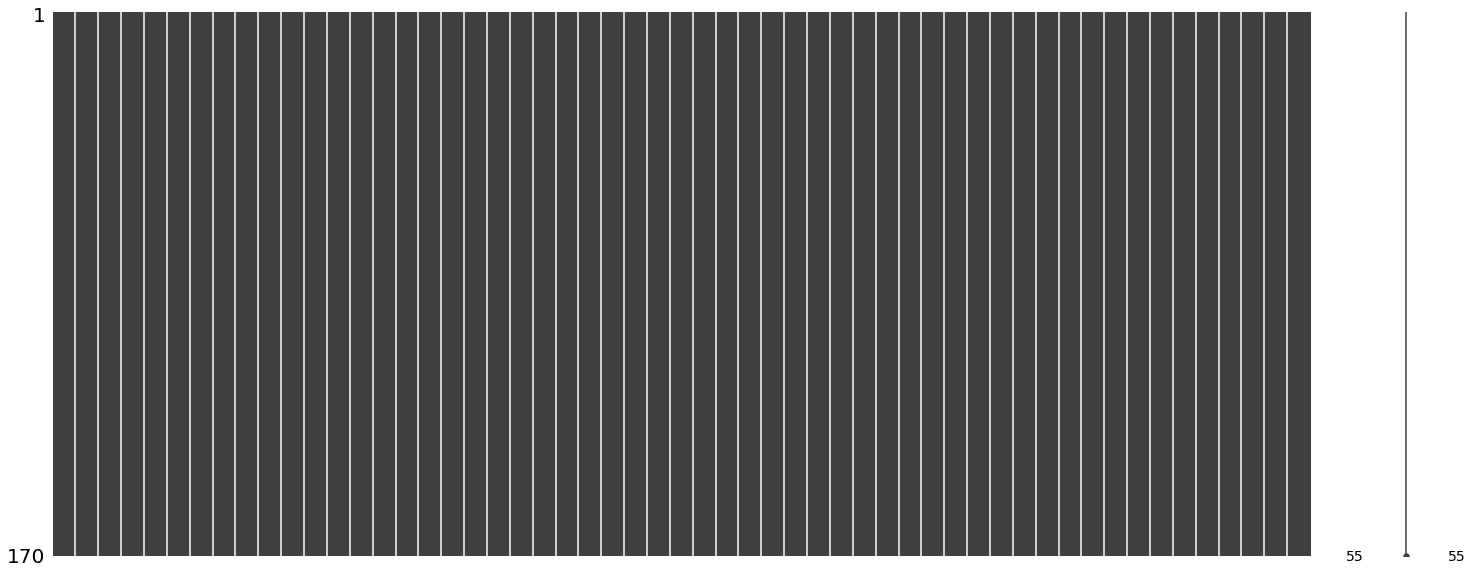

In [7]:
import missingno as msno

msno.matrix(df)

Se puede ver que ninguna de las columnas tiene datos ausentes. De haberlos, dependiendo de la cantidad podria haberlos eliminado o sustituido por (en este caso que son numeros enteros) la moda, o marcar los nulos con un booleano.
Para eso utilizaría
* Eliminar las filas con valores nulos

```df.dropna(inplace=True)```

* Marcar los nulos

```df.isnull()``` 


* Reemplazar los valores nulos de cada columna por la moda de dicha columna

```
for column in df.columns:
    df[column].fillna(df[column].mode(), inplace=True)
```

 

## Outliers

Si bien no tengo outliers, voy a trabajar los datos como si los tuviera utilizando un metodo para eliminarlos (y a sus filas). Este metodo igual no seria recomendable para una cantidad tan limitada de datos.

In [8]:
# Primero selecciono la columna a tratar

df["I'm_right"].describe()

count    170.000000
mean       2.741176
std        1.137348
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: I'm_right, dtype: float64

In [9]:
# Armo los Q1 y Q3
Q1 = df["I'm_right"].quantile(0.25)
Q3 = df["I'm_right"].quantile(0.75)

print("El primer cuartil es {} el segundo cuartil es {}".format(Q1, Q3))

El primer cuartil es 2.0 el segundo cuartil es 4.0


In [10]:
# Ahora obtengo el cuarto intercuartil
IQR = Q3 - Q1
print("El primer cuarto intercuartil es {}".format(IQR))

El primer cuarto intercuartil es 2.0


In [11]:
# Marco el limite inferior y el limite superior de los datos
lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

print("El limite inferior es {} y el limite superior es {}".format(lim_inferior, lim_superior))

El limite inferior es -1.0 y el limite superior es 7.0


In [12]:
# Puedo eliminar las filas del dataframe en las que el valor de la columna seleccionada sea menor al limite inferior o mayor al limite superior
# En realidad lo que hacen estos comandos es volver a guardar en la variable df las filas en las que el valor de la columna sea mayor al limite inferior y menor al limite superior

df = df[df["I'm_right"] > lim_inferior]
df = df[df["I'm_right"] < lim_superior]

# Exploratory Data Analysis

Ahora realizo un analisis grafico de las variables, para eso necesito importar más librerias

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Con esto me traigo el formato de seaborn para los graficos
sns.set()

## Analisis Univariado

Quisiera ver la distribucion de valores para cada columna, ya que las distrubuciones mas planas probablemente no influyan en la conclusion final, para eso hago un loop para graficar todas las columnas

A pesar de saber que no hay outliers en este dataset, me gusta incluir un boxplot para hacerme el hábito de analizar eso mismo

In [15]:
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)

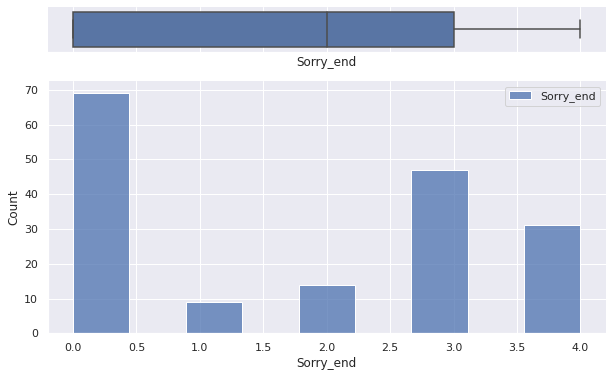

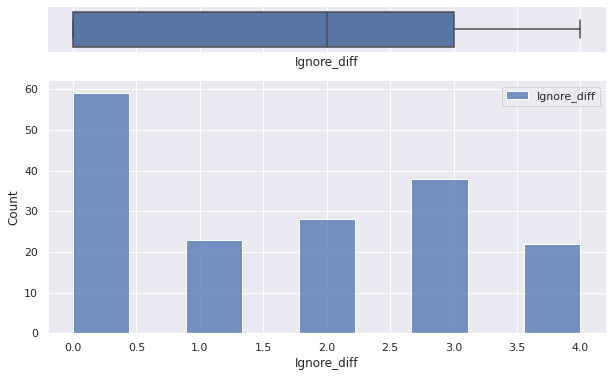

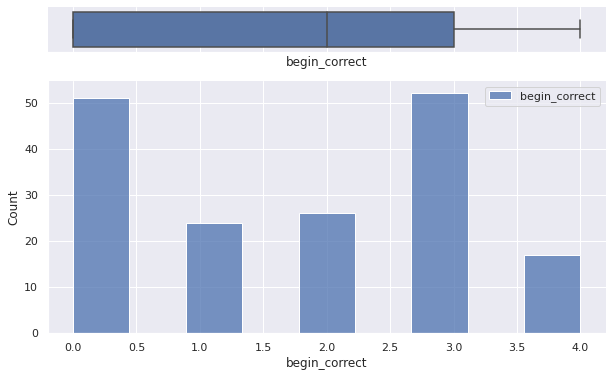

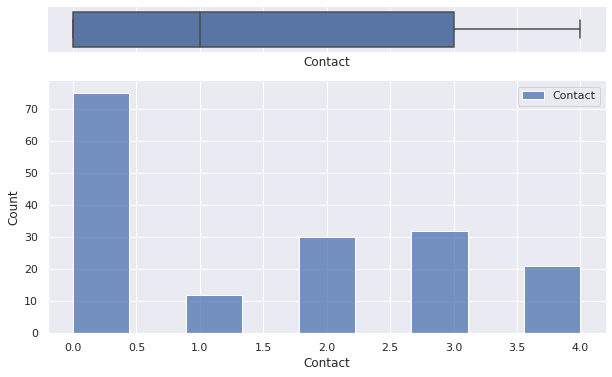

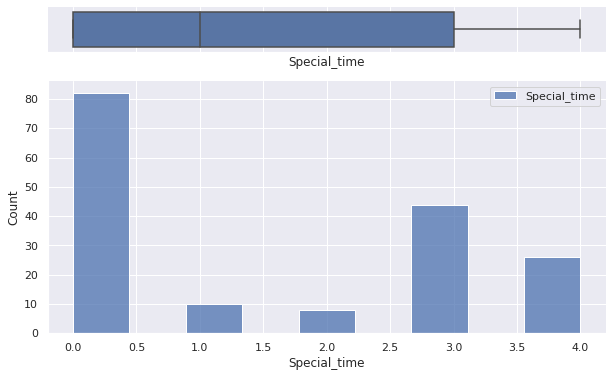

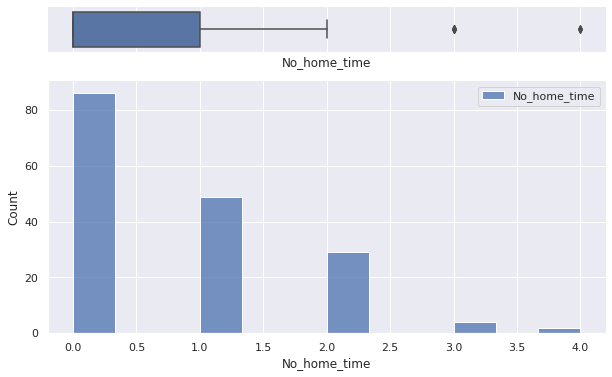

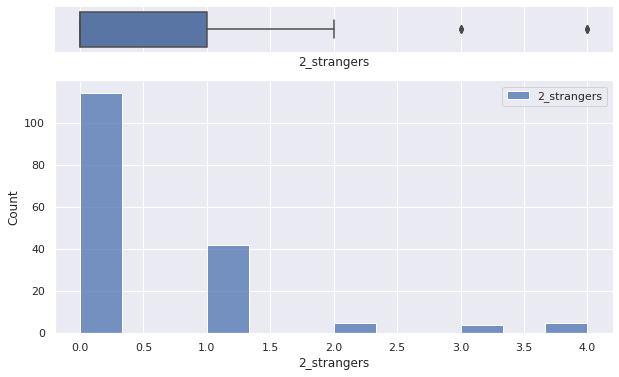

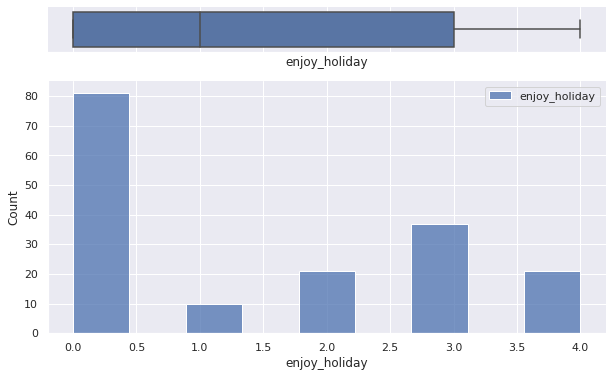

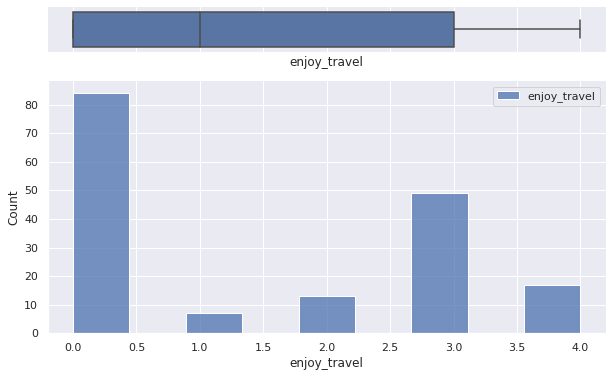

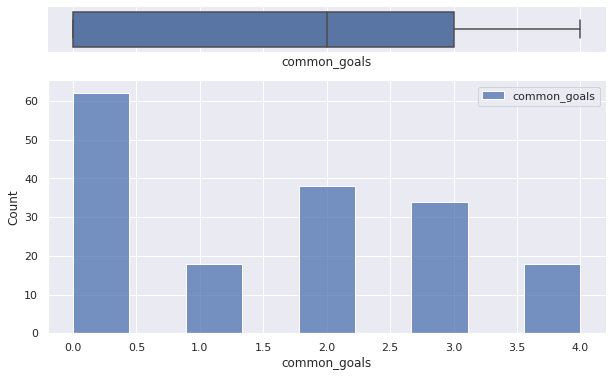

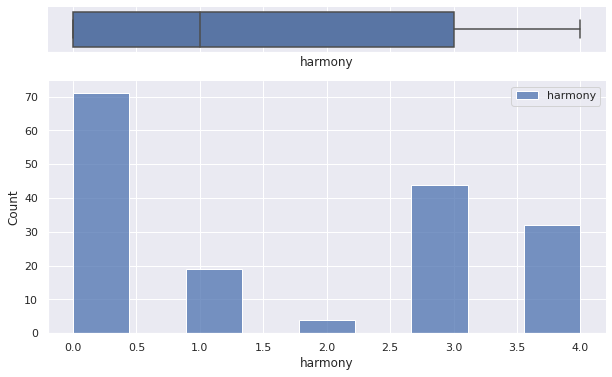

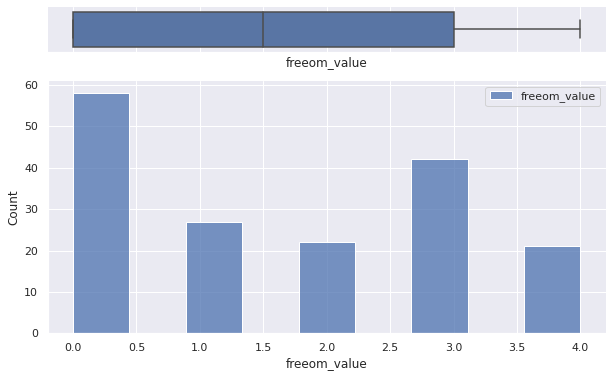

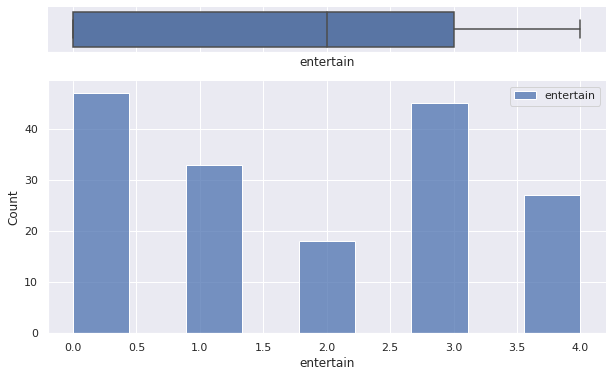

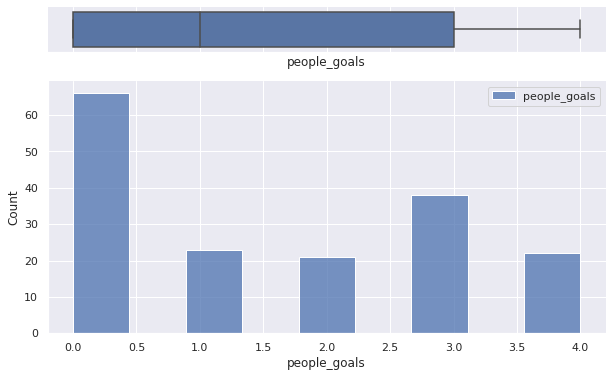

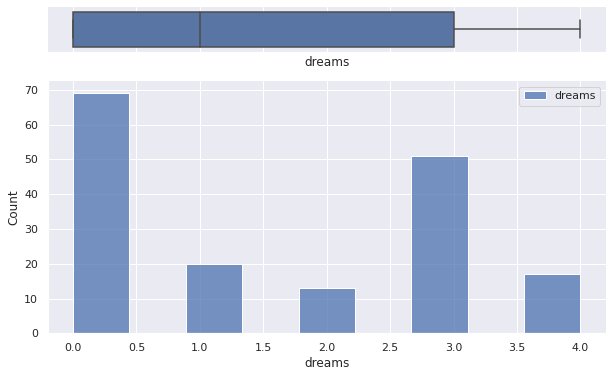

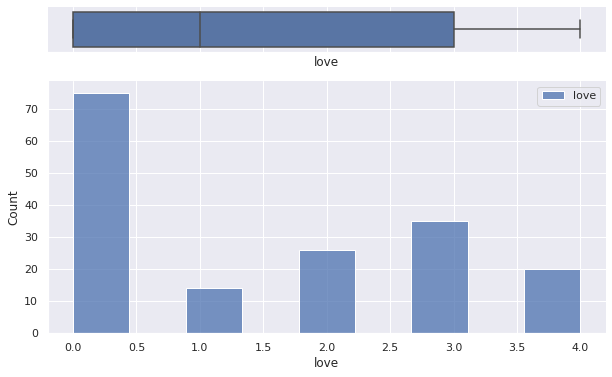

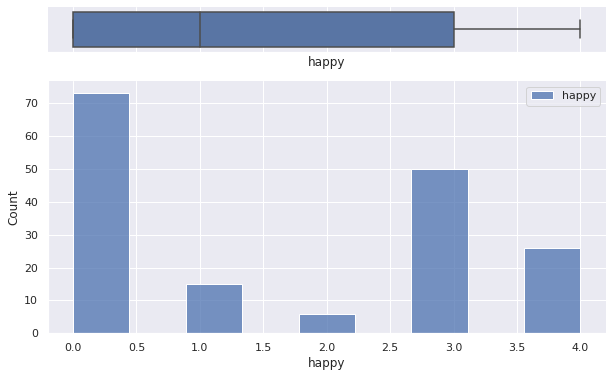

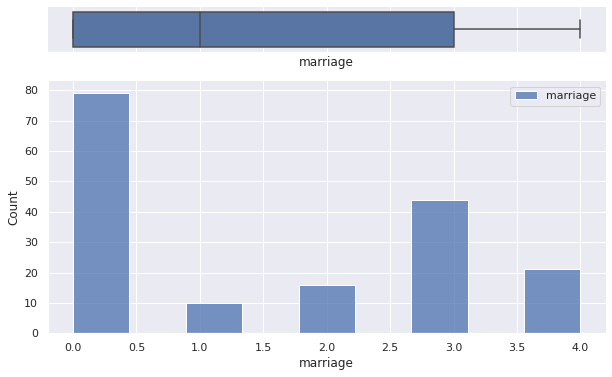

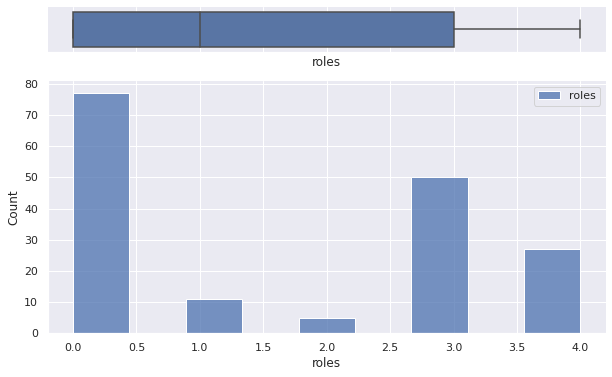

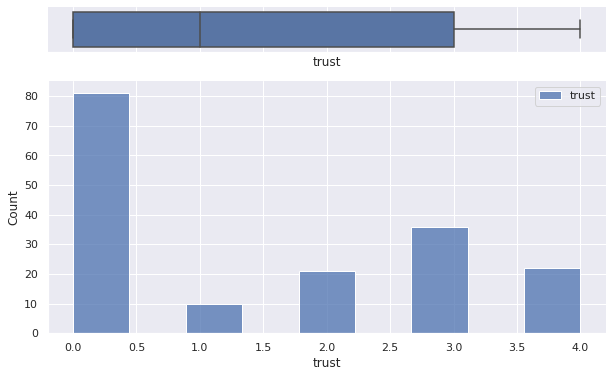

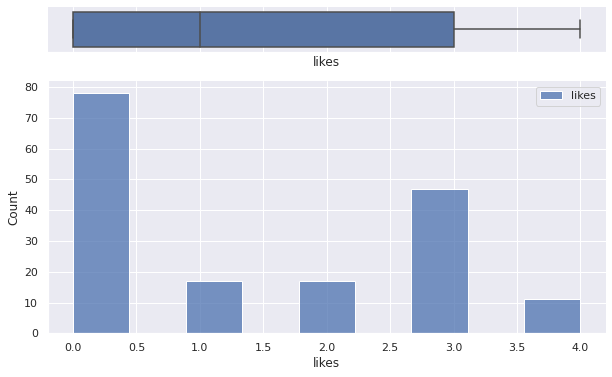

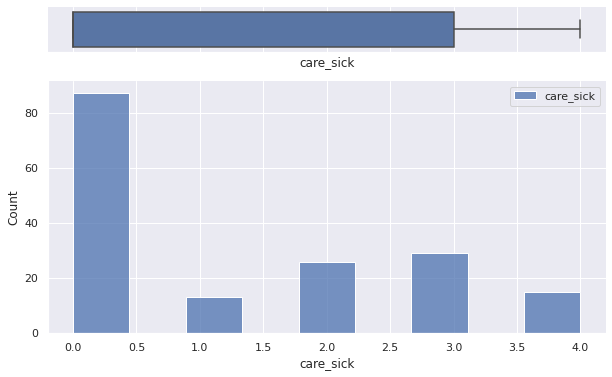

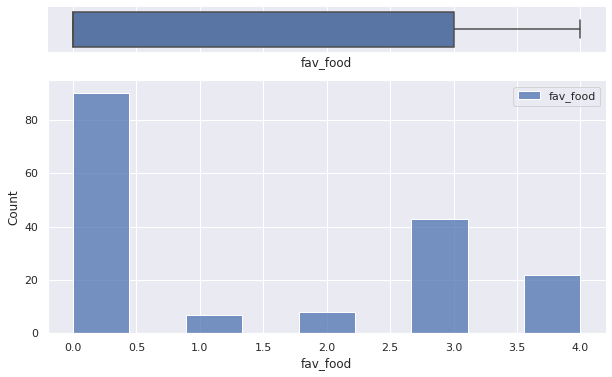

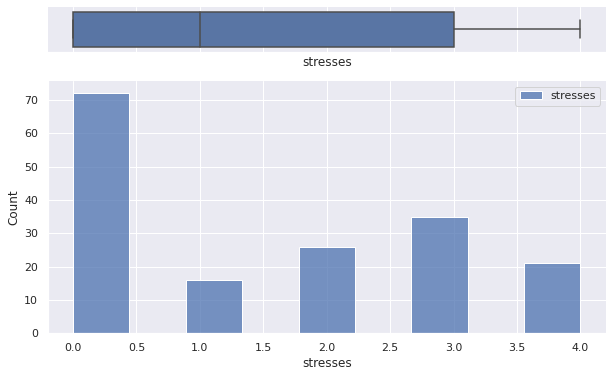

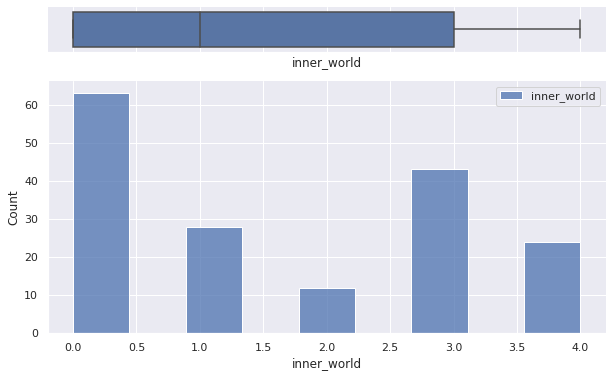

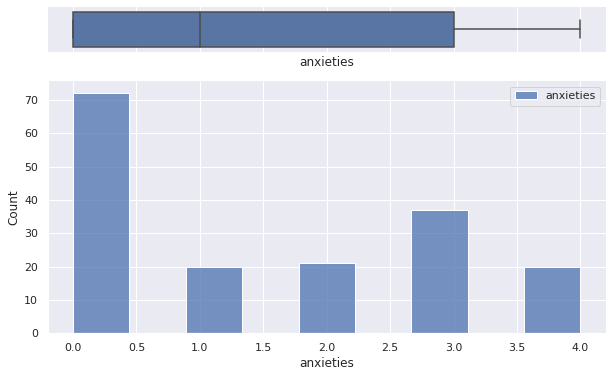

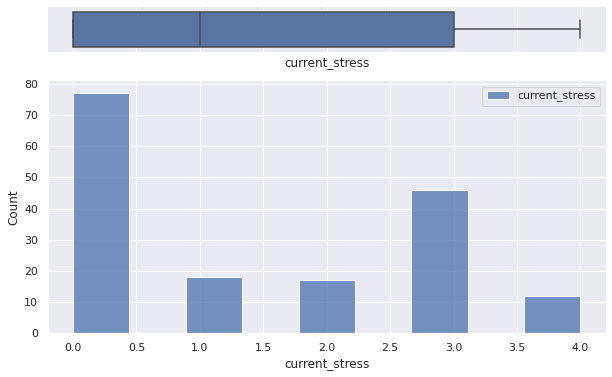

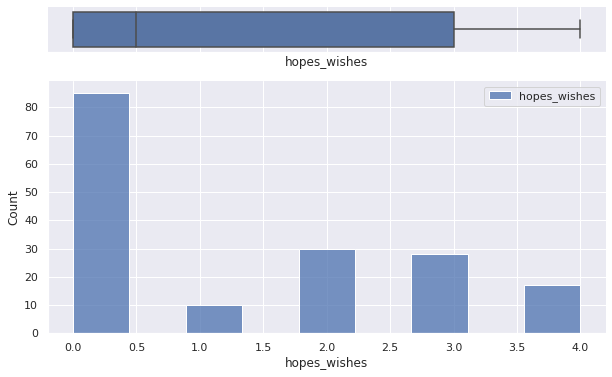

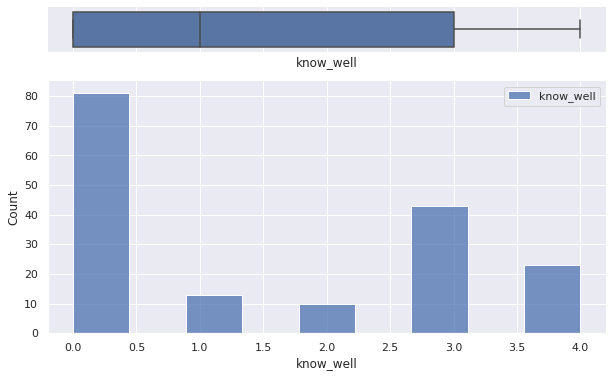

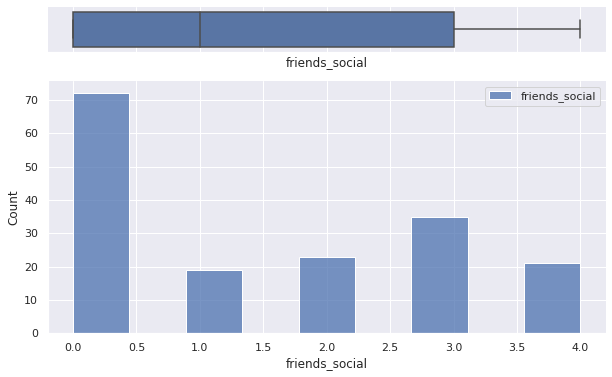

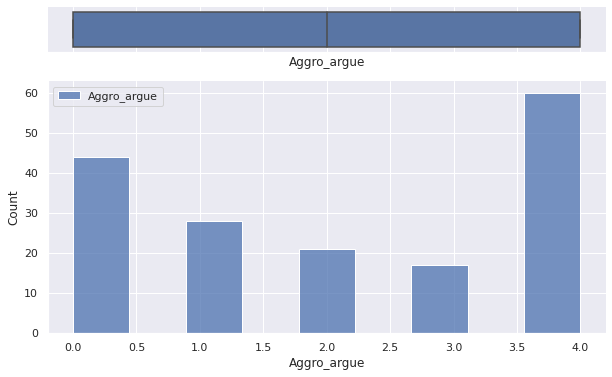

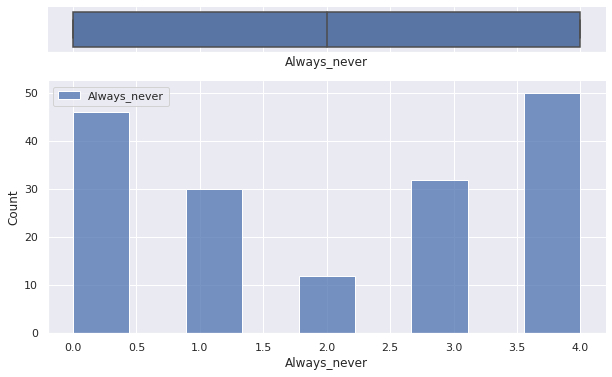

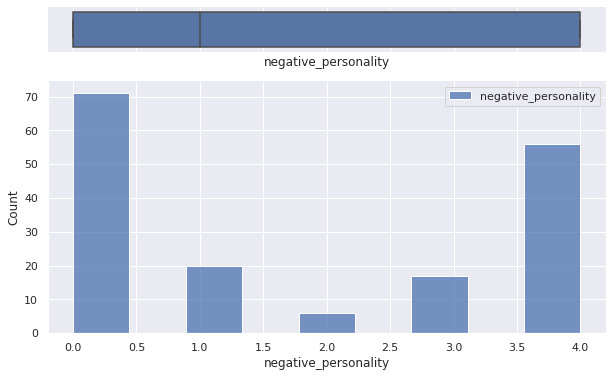

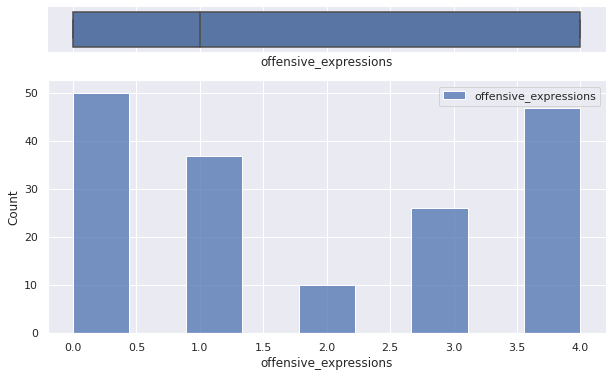

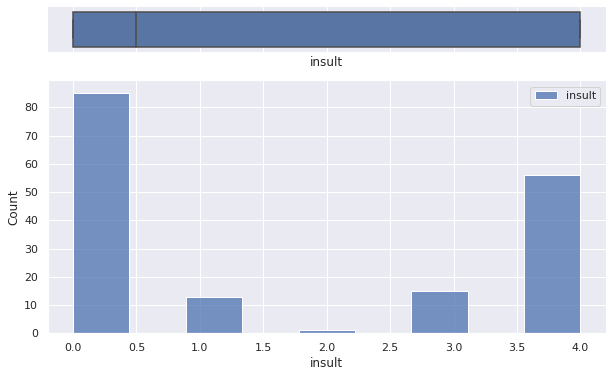

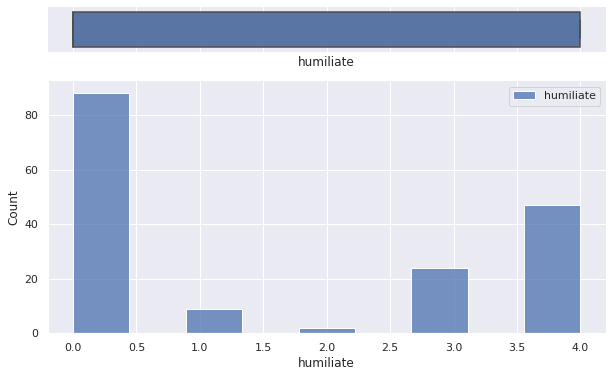

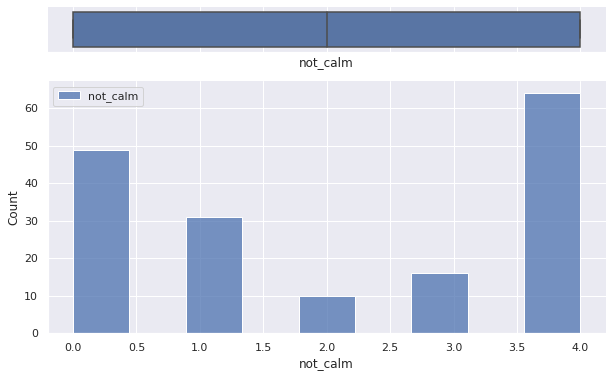

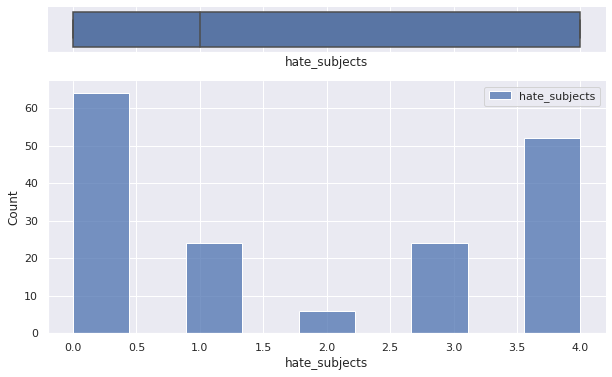

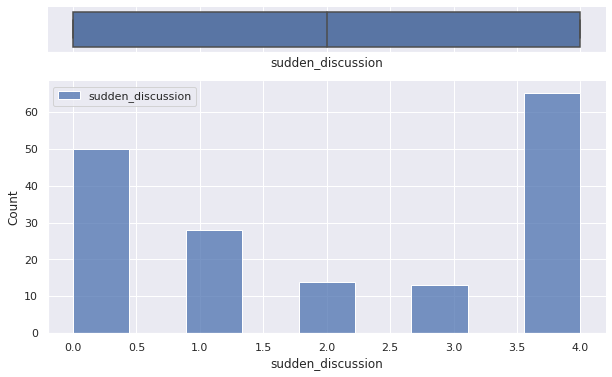

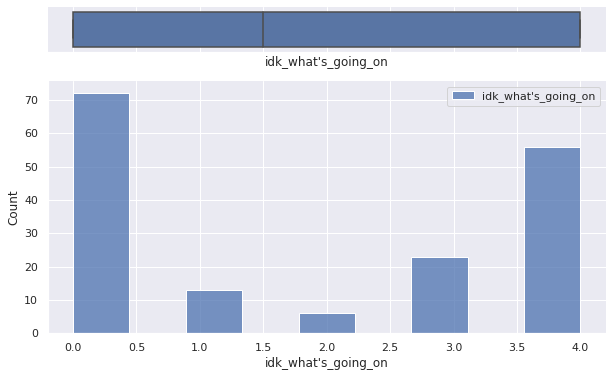

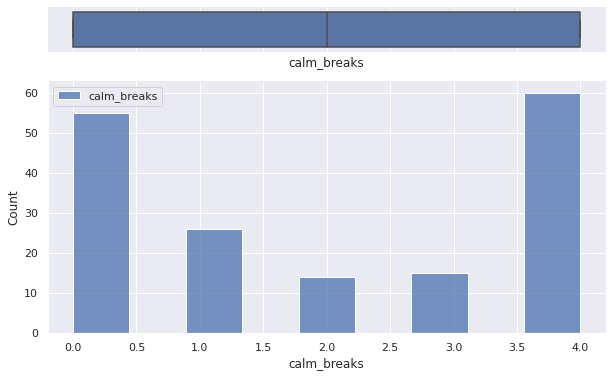

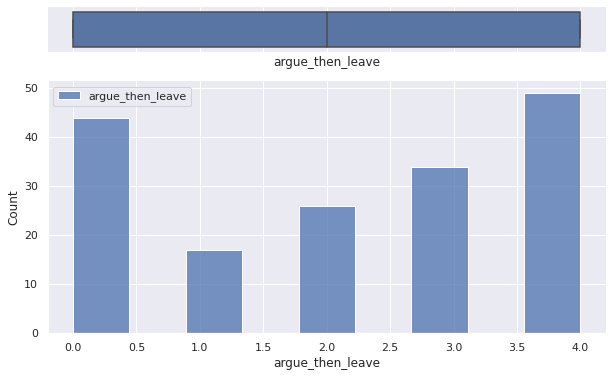

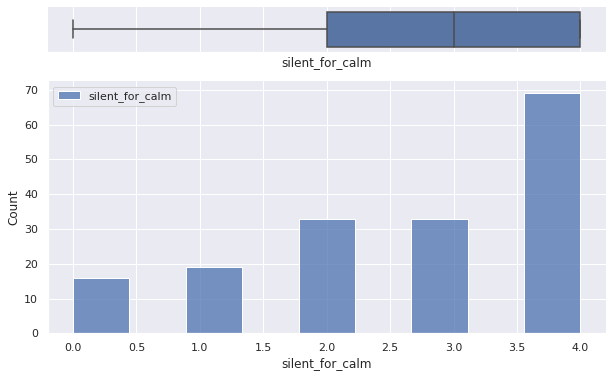

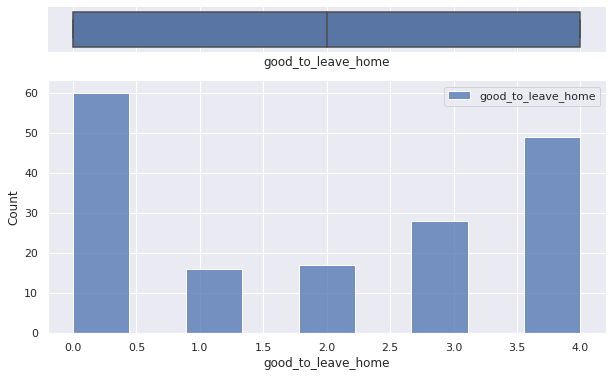

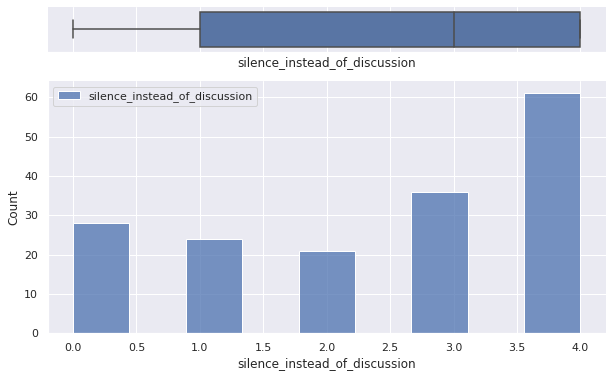

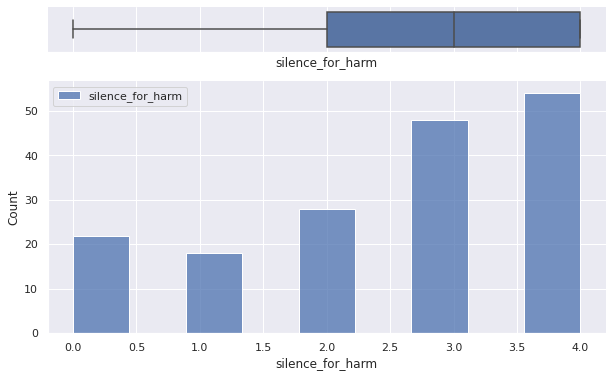

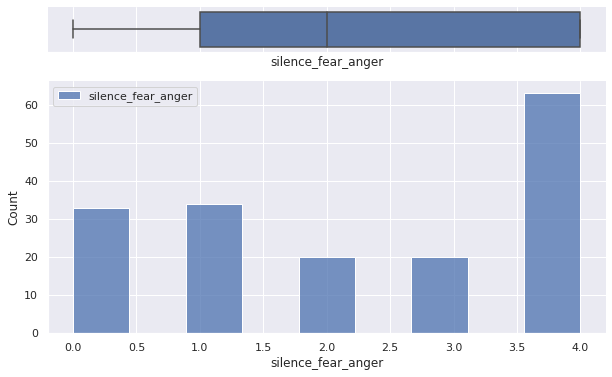

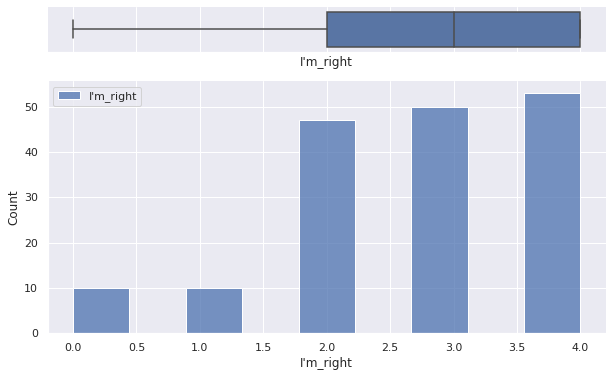

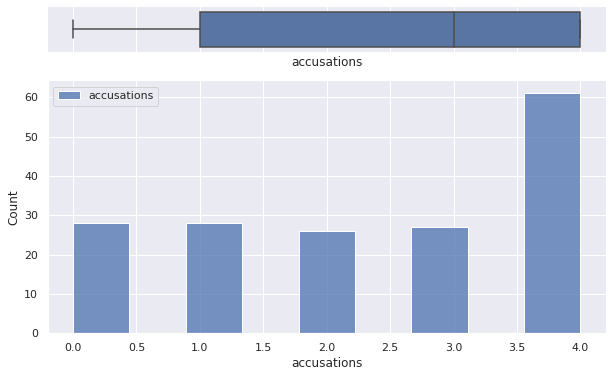

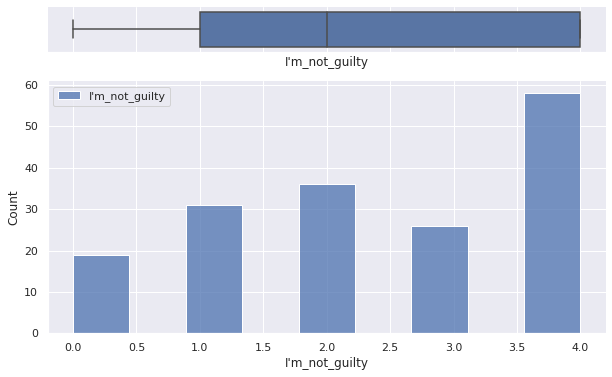

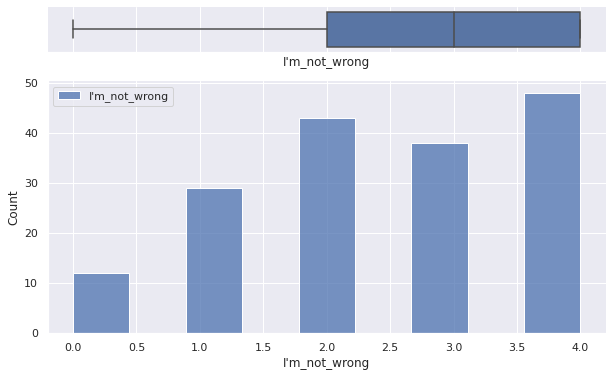

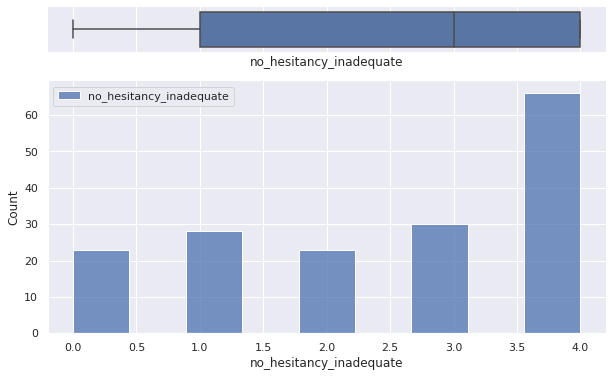

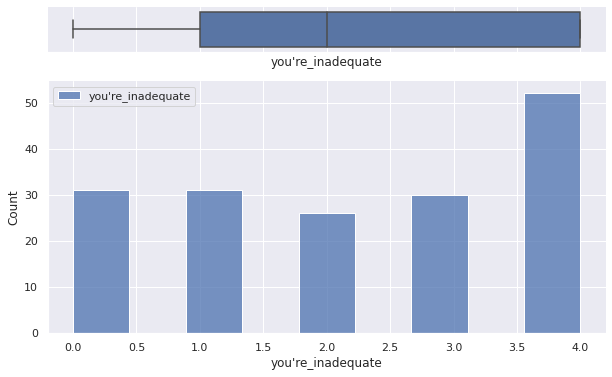

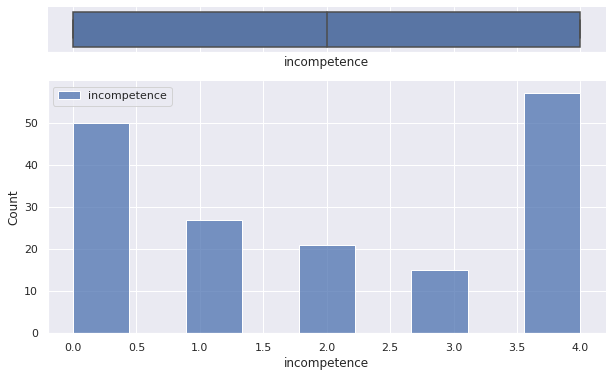

In [16]:
# Itero en todas las columnas menos la de divorcio para ver la distribucion de los datos de todas las variables

for column in df.loc[:, df.columns != 'Divorce_Y_N']:
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
  sns.boxplot(x=df[column], ax=ax_box) 
  sns.histplot(x=df[column], ax=ax_hist, label=column)
  ax_box.set(yticks=[])
  sns.despine(ax=ax_hist)
  sns.despine(ax=ax_box, left=True)
  ax_hist.legend()

## Analisis Bivariado

Siguiendo con mi teoria, ahora voy a realizar un grafico de violines de cada columna separada por la columna de divorcios (nuestra variable dependiente)

In [17]:
df.columns

Index(['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time',
       'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel',
       'common_goals', 'harmony', 'freeom_value', 'entertain', 'people_goals',
       'dreams', 'love', 'happy', 'marriage', 'roles', 'trust', 'likes',
       'care_sick', 'fav_food', 'stresses', 'inner_world', 'anxieties',
       'current_stress', 'hopes_wishes', 'know_well', 'friends_social',
       'Aggro_argue', 'Always_never', 'negative_personality',
       'offensive_expressions', 'insult', 'humiliate', 'not_calm',
       'hate_subjects', 'sudden_discussion', 'idk_what's_going_on',
       'calm_breaks', 'argue_then_leave', 'silent_for_calm',
       'good_to_leave_home', 'silence_instead_of_discussion',
       'silence_for_harm', 'silence_fear_anger', 'I'm_right', 'accusations',
       'I'm_not_guilty', 'I'm_not_wrong', 'no_hesitancy_inadequate',
       'you're_inadequate', 'incompetence', 'Divorce_Y_N'],
      dtype='object')

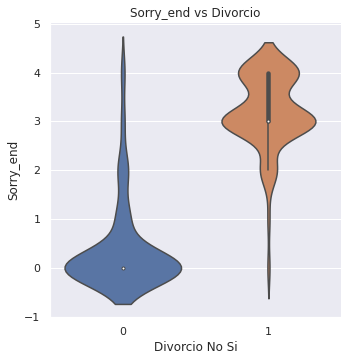

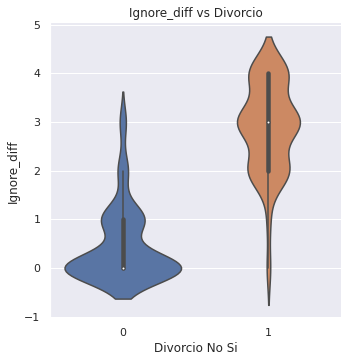

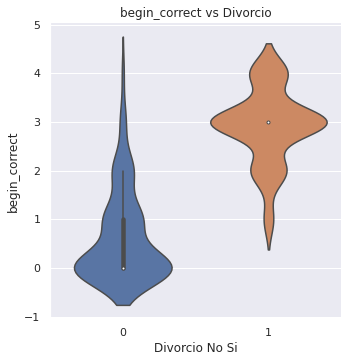

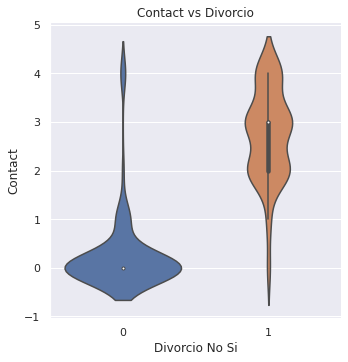

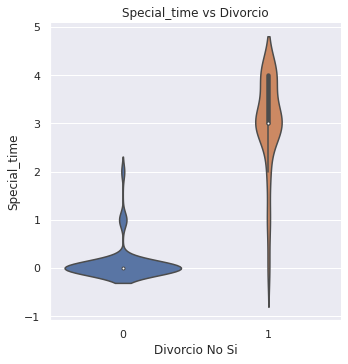

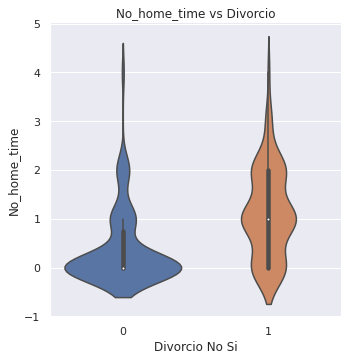

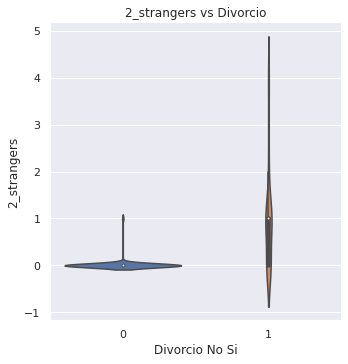

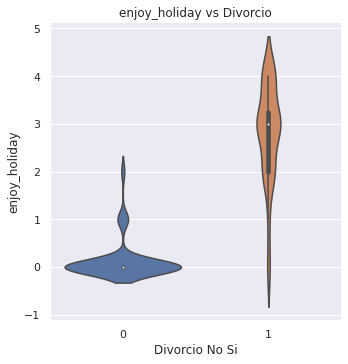

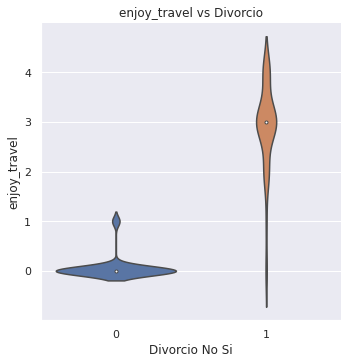

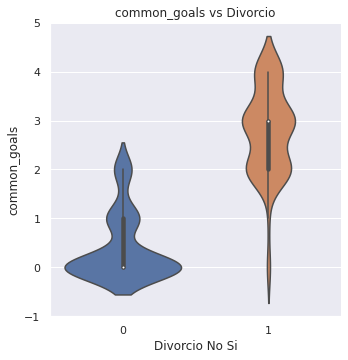

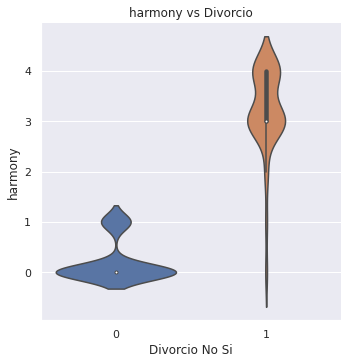

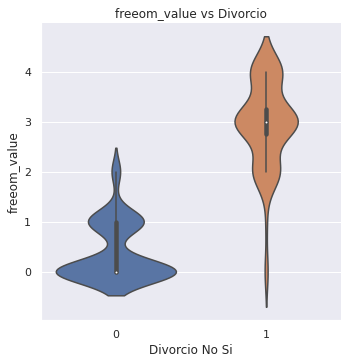

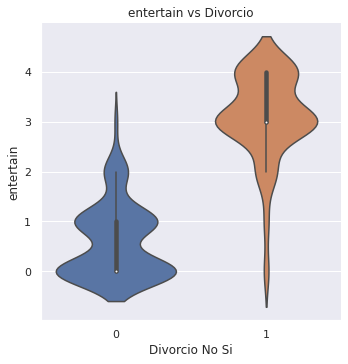

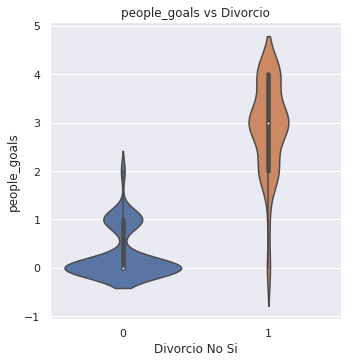

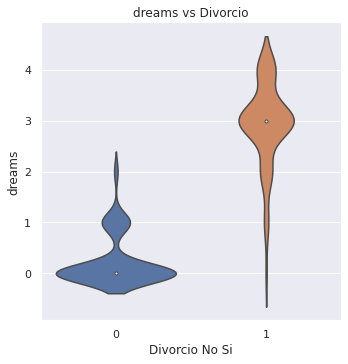

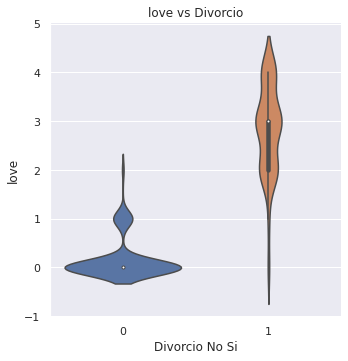

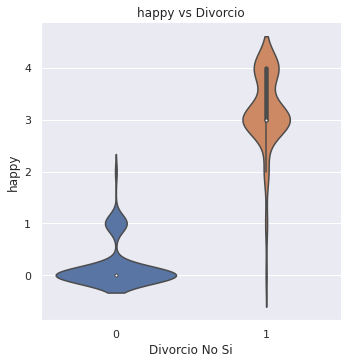

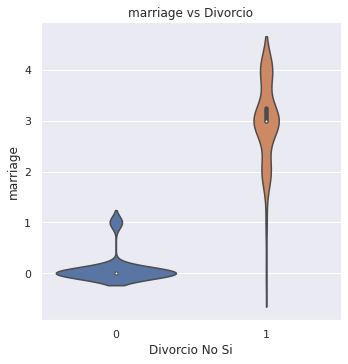

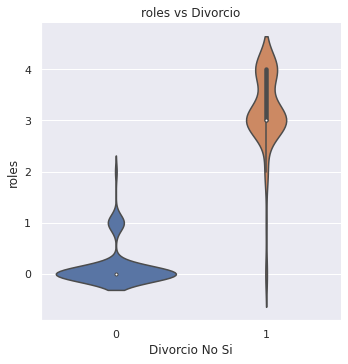

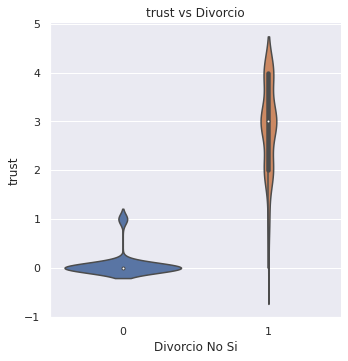

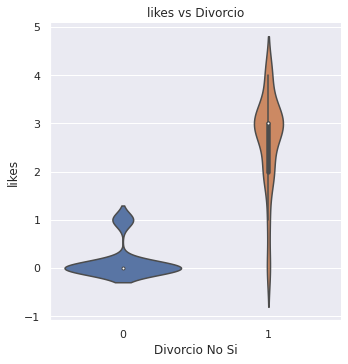

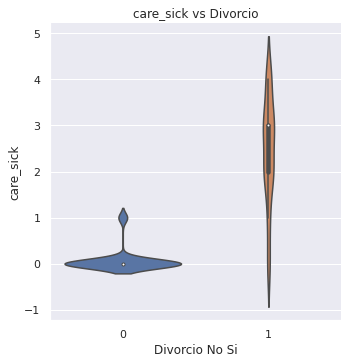

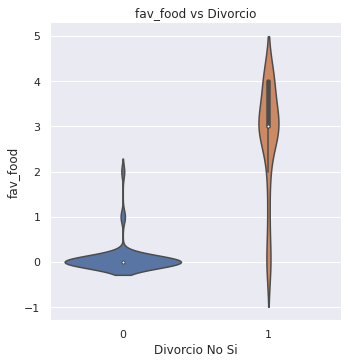

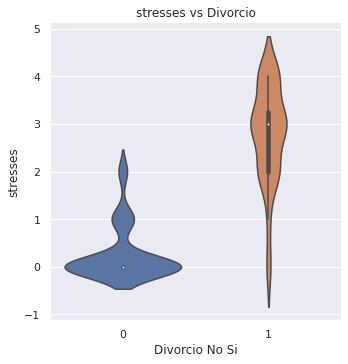

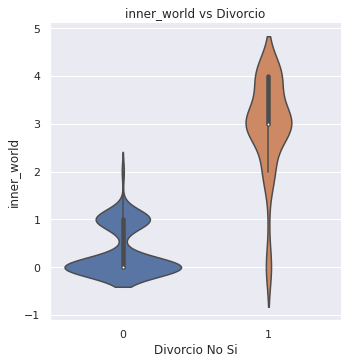

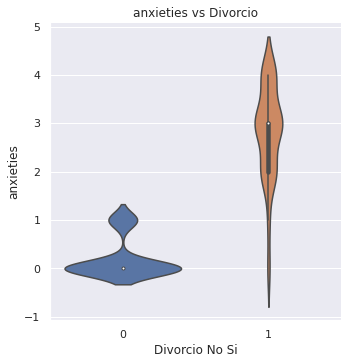

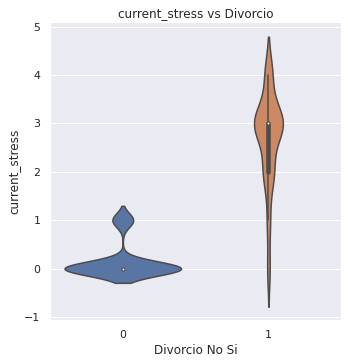

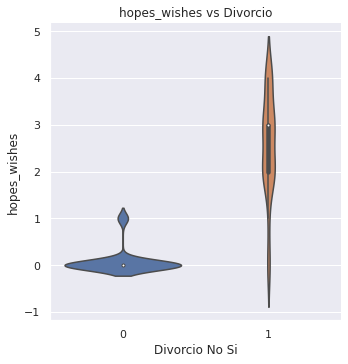

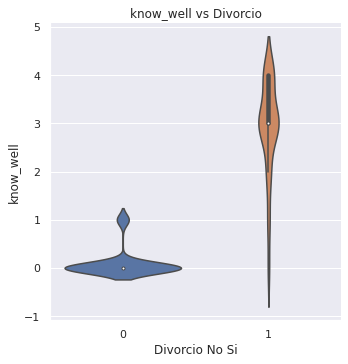

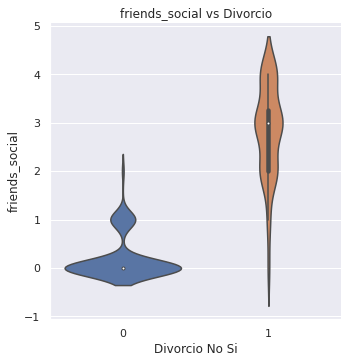

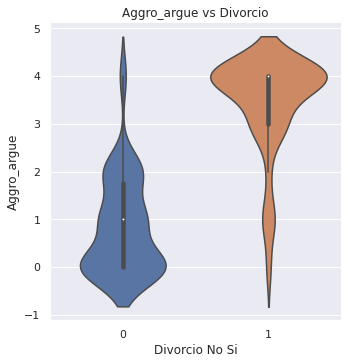

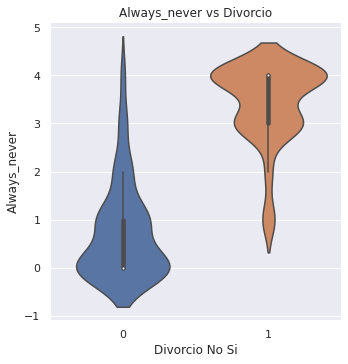

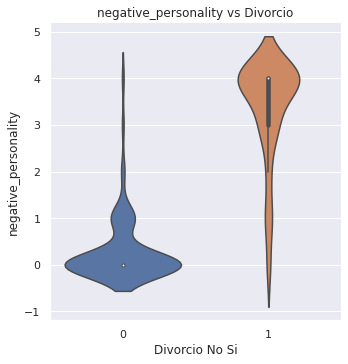

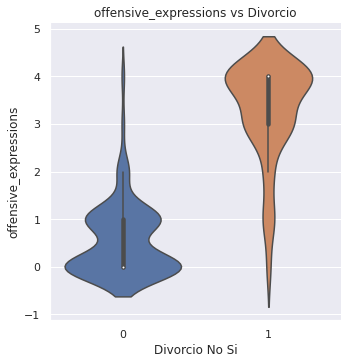

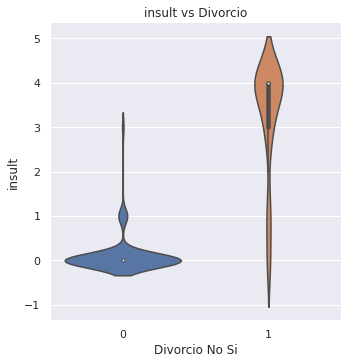

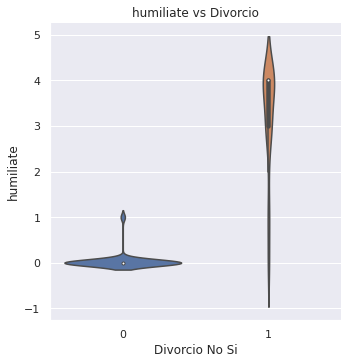

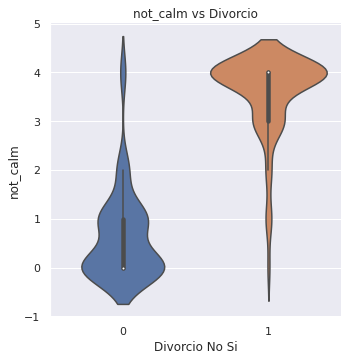

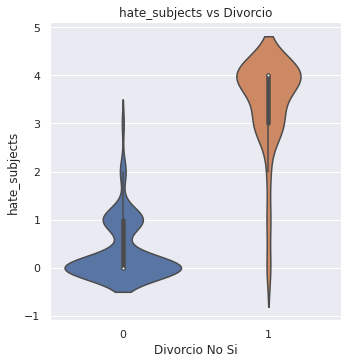

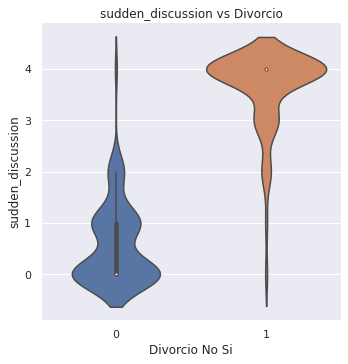

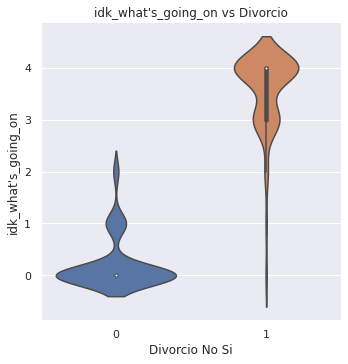

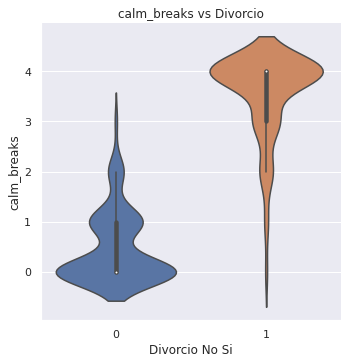

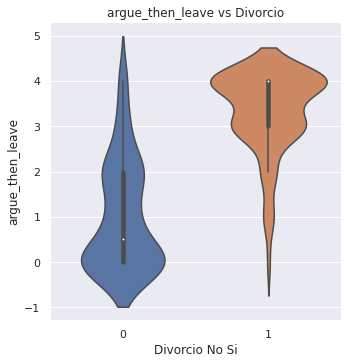

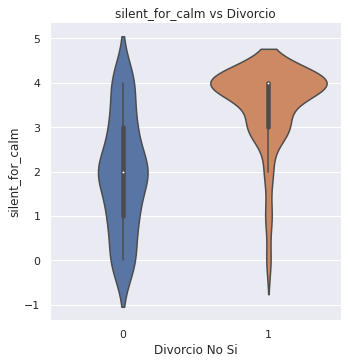

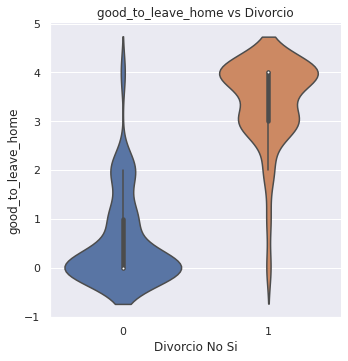

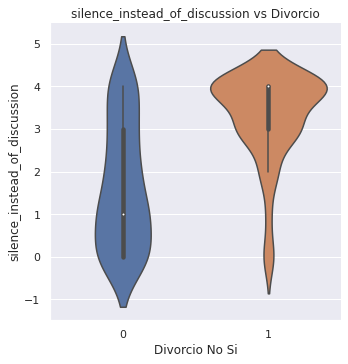

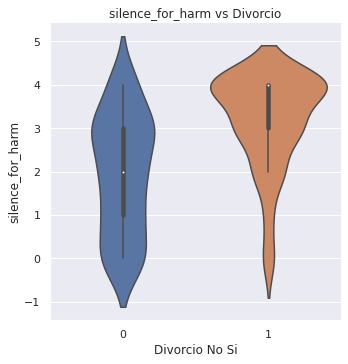

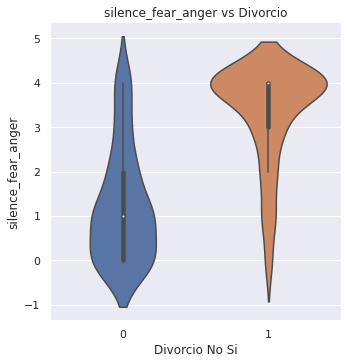

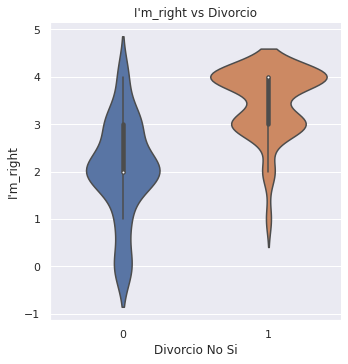

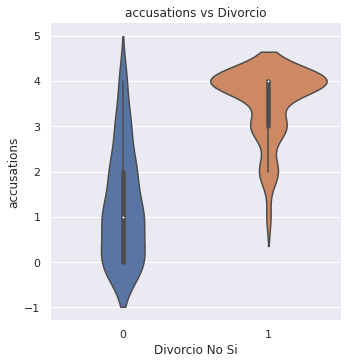

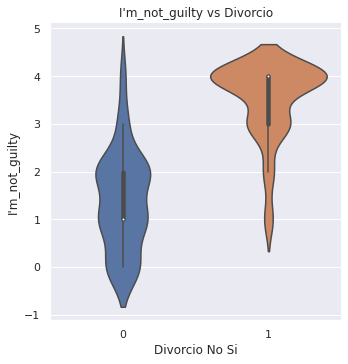

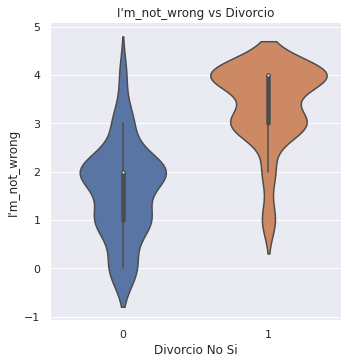

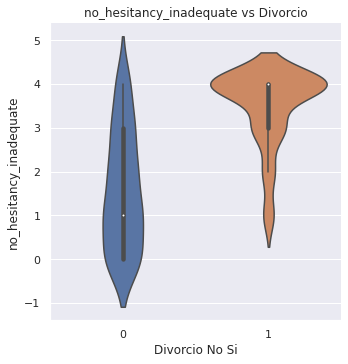

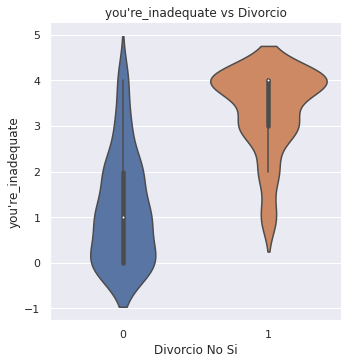

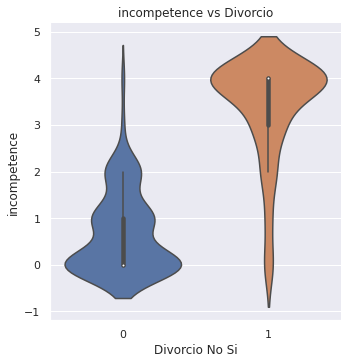

In [18]:
for column in df.loc[:, df.columns != 'Divorce_Y_N']:
  ax = sns.catplot(data=df, kind='violin', x='Divorce_Y_N', y=column, split=True)
  ax.set(xlabel='Divorcio No Si', ylabel=column, title='{} vs Divorcio'.format(column))

Si bien hay distintas distribuciones, en todas las preguntas se puede observar que hay una mayor cantidad de divorcios en quiene responden con un puntaje alto

Sin embargo falta aclarar que tan grande es la correlacion entre las variables y la probabilidad de divorcio

## Analisis Multivariado

In [19]:
for column in df.loc[:, df.columns != 'Divorce_Y_N']:
  correlacion = df[[column, 'Divorce_Y_N']].corr()
  print("La correlacion de {} con la probabilidad de divorcio es de {}".format(column,correlacion[column][1]))
  print("------------------------------------------")
  


La correlacion de Sorry_end con la probabilidad de divorcio es de 0.8613241694323776
------------------------------------------
La correlacion de Ignore_diff con la probabilidad de divorcio es de 0.8207741765156772
------------------------------------------
La correlacion de begin_correct con la probabilidad de divorcio es de 0.8067085149115998
------------------------------------------
La correlacion de Contact con la probabilidad de divorcio es de 0.8195828719084535
------------------------------------------
La correlacion de Special_time con la probabilidad de divorcio es de 0.8931798255682634
------------------------------------------
La correlacion de No_home_time con la probabilidad de divorcio es de 0.4209125435471137
------------------------------------------
La correlacion de 2_strangers con la probabilidad de divorcio es de 0.5448352001755801
------------------------------------------
La correlacion de enjoy_holiday con la probabilidad de divorcio es de 0.8695690272059442
---

Teniendo tantas columnas, y tantas con correlaciones altas, voy a eliminar las columnas cuya correlacion sea menor a 85%
Luego, para reducier incluso mas la cantidad de variables, voy a realizar un PCA

In [20]:
for column in df.loc[:, df.columns != 'Divorce_Y_N']:
  correlacion = df[[column, 'Divorce_Y_N']].corr()
  if correlacion[column][1] < 0.85:
    df.drop(column, axis=1, inplace=True)

df.columns

Index(['Sorry_end', 'Special_time', 'enjoy_holiday', 'enjoy_travel', 'harmony',
       'freeom_value', 'people_goals', 'dreams', 'love', 'happy', 'marriage',
       'roles', 'trust', 'likes', 'inner_world', 'anxieties', 'current_stress',
       'know_well', 'friends_social', 'negative_personality', 'insult',
       'humiliate', 'not_calm', 'hate_subjects', 'sudden_discussion',
       'idk_what's_going_on', 'calm_breaks', 'Divorce_Y_N'],
      dtype='object')

In [21]:
df.shape

(170, 28)

Pase de tener 55 columnas a solo 28, casi la mitad

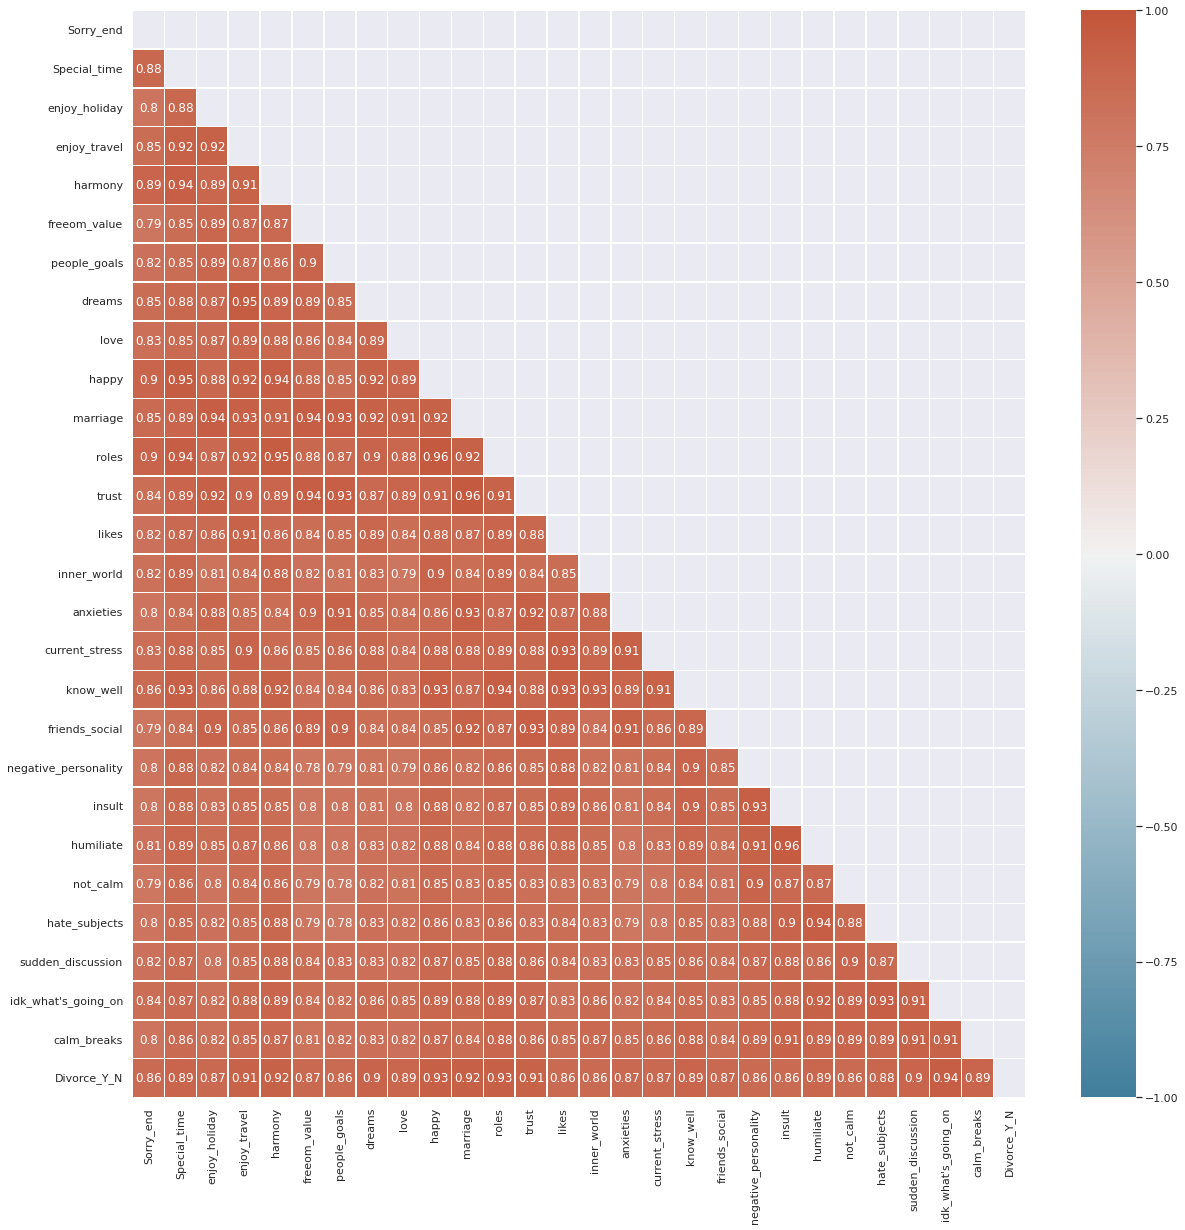

In [22]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, vmax=1, vmin=-1,
            square=False, linewidths=.5, annot=True)

# PCA

Para reducir la dimensionalidad voy a utilizar el PCA, en esta oportunidad no necesito normalizar los datos porque ya estan normalizados.

In [23]:
# Primero divido los datos en las variables independientes x y la dependiente y

X = df.drop(columns = 'Divorce_Y_N')
y = df['Divorce_Y_N']

In [24]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# importamos y aplicamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [26]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.87164697, 0.02898134, 0.01611762, 0.01313356, 0.01156309])

In [44]:
# Verifico la forma de los arrays de entrenamiento y de testeo

print("El set de entrenamiento tiene {} columnas y {} filas \n".format(X_train.shape[1], X_train.shape[0]),
      "El set de testeo tiene {} columnas y {} filas".format(X_test.shape[1], X_test.shape[0]))

El set de entrenamiento tiene 5 columnas y 119 filas 
 El set de testeo tiene 5 columnas y 51 filas


# Seleccionando el modelo

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Creación del modelo Random Forest
model_rf = RandomForestClassifier(max_depth=2, random_state=0)

# Creacion del modelo SVC
model_svc = SVC(C = 100, kernel = 'linear', random_state=0)

# Creacion modelo Decision Tree
model_tree = DecisionTreeClassifier(max_depth=5, random_state = 0) 

# Creacion modelo knn
model_knn = KNeighborsClassifier(n_neighbors=3)

# Creacion modelo Regresion Logistica
model_reglog = LogisticRegression()

In [46]:
# Entrenamiento Random Forest
model_rf.fit(X_train, y_train)

#Entrenamiento SVC
model_svc.fit(X_train, y_train)

#Entrenamos el modelo Decision Tree
model_tree.fit(X_train,y_train)

#Entrenamos el modelo KNN
model_knn.fit(X_train,y_train)

#Entrenamos el modelo Regresion Logistica
model_reglog.fit(X_train,y_train)

LogisticRegression()

In [47]:
# Predicciones Random Forest
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# Predicciones SVC 
y_train_pred_svc = model_svc.predict(X_train)
y_test_pred_svc = model_svc.predict(X_test)

# Predicciones Decision Tree
y_train_pred_tree = model_tree.predict(X_train) 
y_test_pred_tree = model_tree.predict(X_test)

# Predicciones KNN
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)

# Predicciones Regresion Logistica
y_train_pred_reglog = model_reglog.predict(X_train)
y_test_pred_reglog = model_reglog.predict(X_test)

In [49]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

RANDOM FOREST: 
 set de entrenamiento:  1.0 % accuracy, 1.0 % F1, 1.0 % precision, 1.0 % recall 
 set de evaluación:     1.0 % accuracy, 1.0 % F1, 1.0 % precision, 1.0 % recall 



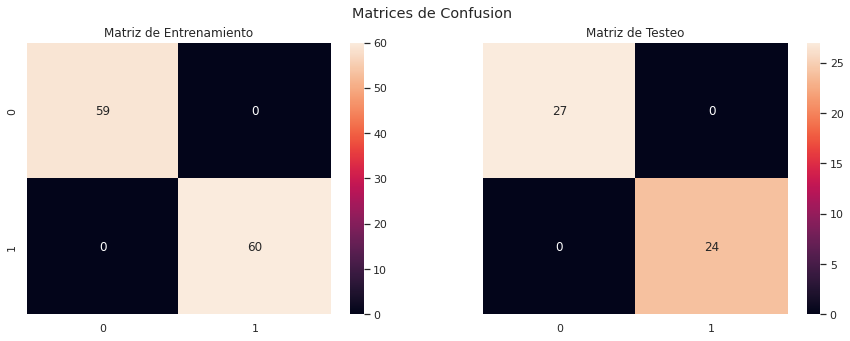

In [78]:
# RANDOM FOREST
# Calculo las metricas en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)

# Calculo las metricas en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)


print('RANDOM FOREST: \n',
      'set de entrenamiento:  {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(train_accuracy_rf, train_f1_rf, train_precision_rf, train_recall_rf),
      'set de evaluación:     {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(test_accuracy_rf, test_f1_rf, test_precision_rf, test_recall_rf))


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Matrices de Confusion')

sns.heatmap(confusion_matrix(y_train, y_train_pred_rf), annot=True, ax=axes[0])
axes[0].set_title("Matriz de Entrenamiento")

sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, ax=axes[1])
axes[1].set_title("Matriz de Testeo")
plt.show()

SVC: 
 set de entrenamiento:  1.0 % accuracy, 1.0 % F1, 1.0 % precision, 1.0 % recall 
 set de evaluación:     0.9803921568627451 % accuracy, 0.9787234042553191 % F1, 1.0 % precision, 0.9583333333333334 % recall 



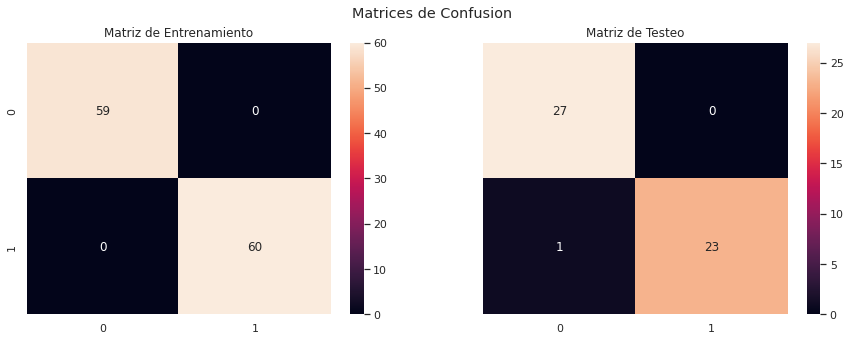

In [79]:
# SVC
# Calculo las metricas en Train
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
train_f1_svc = f1_score(y_train, y_train_pred_svc)
train_precision_svc = precision_score(y_train, y_train_pred_svc)
train_recall_svc = recall_score(y_train, y_train_pred_svc)

# Calculo las metricas en Test
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
test_f1_svc = f1_score(y_test, y_test_pred_svc)
test_precision_svc = precision_score(y_test, y_test_pred_svc)
test_recall_svc = recall_score(y_test, y_test_pred_svc)


print('SVC: \n',
      'set de entrenamiento:  {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(train_accuracy_svc, train_f1_svc, train_precision_svc, train_recall_svc),
      'set de evaluación:     {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(test_accuracy_svc, test_f1_svc, test_precision_svc, test_recall_svc))


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Matrices de Confusion')

sns.heatmap(confusion_matrix(y_train, y_train_pred_svc), annot=True, ax=axes[0])
axes[0].set_title("Matriz de Entrenamiento")

sns.heatmap(confusion_matrix(y_test, y_test_pred_svc), annot=True, ax=axes[1])
axes[1].set_title("Matriz de Testeo")
plt.show()

DECISION TREE: 
 set de entrenamiento:  1.0 % accuracy, 1.0 % F1, 1.0 % precision, 1.0 % recall 
 set de evaluación:     1.0 % accuracy, 1.0 % F1, 1.0 % precision, 1.0 % recall 



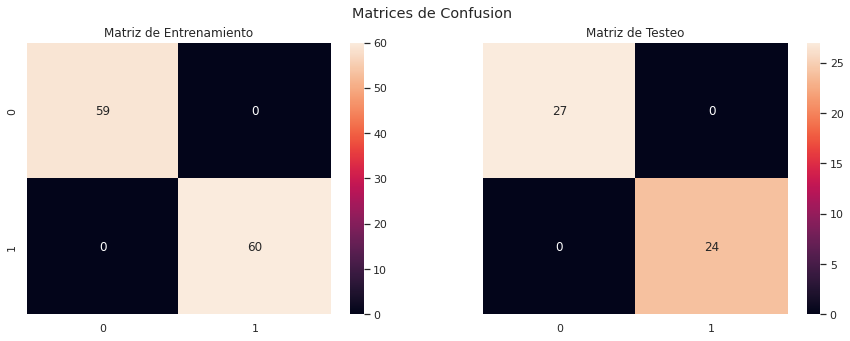

In [82]:
# Decision Tree
# Calculo las metricas en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
train_f1_tree = f1_score(y_train, y_train_pred_tree)
train_precision_tree = precision_score(y_train, y_train_pred_tree)
train_recall_tree = recall_score(y_train, y_train_pred_tree)

# Calculo las metricas en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
test_f1_tree = f1_score(y_test, y_test_pred_tree)
test_precision_tree = precision_score(y_test, y_test_pred_tree)
test_recall_tree = recall_score(y_test, y_test_pred_tree)


print('DECISION TREE: \n',
      'set de entrenamiento:  {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(train_accuracy_tree, train_f1_tree, train_precision_tree, train_recall_tree),
      'set de evaluación:     {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(test_accuracy_tree, test_f1_tree, test_precision_tree, test_recall_tree))


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Matrices de Confusion')

sns.heatmap(confusion_matrix(y_train, y_train_pred_tree), annot=True, ax=axes[0])
axes[0].set_title("Matriz de Entrenamiento")

sns.heatmap(confusion_matrix(y_test, y_test_pred_tree), annot=True, ax=axes[1])
axes[1].set_title("Matriz de Testeo")
plt.show()

KNN: 
 set de entrenamiento:  0.9831932773109243 % accuracy, 0.983050847457627 % F1, 1.0 % precision, 0.9666666666666667 % recall 
 set de evaluación:     0.9607843137254902 % accuracy, 0.9565217391304348 % F1, 1.0 % precision, 0.9166666666666666 % recall 



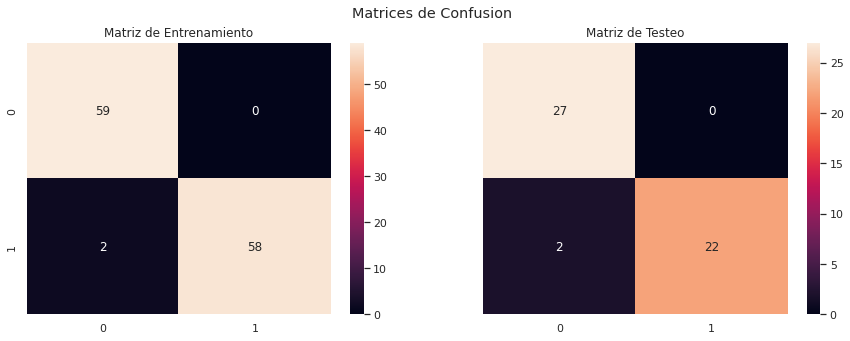

In [83]:
# KNN
# Calculo las metricas en Train
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
train_f1_knn = f1_score(y_train, y_train_pred_knn)
train_precision_knn = precision_score(y_train, y_train_pred_knn)
train_recall_knn = recall_score(y_train, y_train_pred_knn)
 
# Calculo las metricas en Test
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)
test_precision_knn = precision_score(y_test, y_test_pred_knn)
test_recall_knn = recall_score(y_test, y_test_pred_knn)
 
 
print('KNN: \n',
      'set de entrenamiento:  {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(train_accuracy_knn, train_f1_knn, train_precision_knn, train_recall_knn),
      'set de evaluación:     {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(test_accuracy_knn, test_f1_knn, test_precision_knn, test_recall_knn))
 
 
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Matrices de Confusion')
 
sns.heatmap(confusion_matrix(y_train, y_train_pred_knn), annot=True, ax=axes[0])
axes[0].set_title("Matriz de Entrenamiento")
 
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, ax=axes[1])
axes[1].set_title("Matriz de Testeo")
plt.show()


Regresion Logistica: 
 set de entrenamiento:  1.0 % accuracy, 1.0 % F1, 1.0 % precision, 1.0 % recall 
 set de evaluación:     0.9607843137254902 % accuracy, 0.9565217391304348 % F1, 1.0 % precision, 0.9166666666666666 % recall 



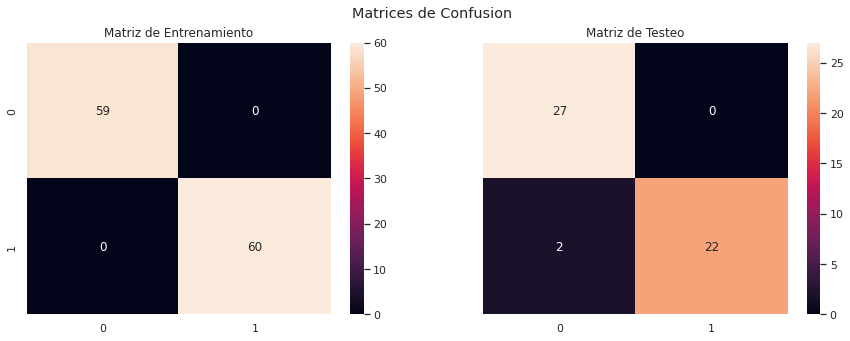

In [84]:
# Regresion Logistica
# Calculo las metricas en Train
train_accuracy_reglog = accuracy_score(y_train, y_train_pred_reglog)
train_f1_reglog = f1_score(y_train, y_train_pred_reglog)
train_precision_reglog = precision_score(y_train, y_train_pred_reglog)
train_recall_reglog = recall_score(y_train, y_train_pred_reglog)
 
# Calculo las metricas en Test
test_accuracy_reglog = accuracy_score(y_test, y_test_pred_reglog)
test_f1_reglog = f1_score(y_test, y_test_pred_reglog)
test_precision_reglog = precision_score(y_test, y_test_pred_reglog)
test_recall_reglog = recall_score(y_test, y_test_pred_reglog)
 
 
print('Regresion Logistica: \n',
      'set de entrenamiento:  {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(train_accuracy_reglog, train_f1_reglog, train_precision_reglog, train_recall_reglog),
      'set de evaluación:     {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(test_accuracy_reglog, test_f1_reglog, test_precision_reglog, test_recall_reglog))
 
 
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Matrices de Confusion')
 
sns.heatmap(confusion_matrix(y_train, y_train_pred_reglog), annot=True, ax=axes[0])
axes[0].set_title("Matriz de Entrenamiento")
 
sns.heatmap(confusion_matrix(y_test, y_test_pred_reglog), annot=True, ax=axes[1])
axes[1].set_title("Matriz de Testeo")
plt.show()


# Hypertunning

Podria dejar el modelo como esta, ya que estoy obteniendo resultados del 100%

Pero voy a intentar mejorar el modelo de menor rendimiento para practicar el ajuste de hiperparametros.

Por lo tanto, voy a intentar mejorar el KNN

## Gridsearch

In [85]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':(5, 10, 15, 20), 'weights':('uniform', 'distance'), 'p':(1,2), 'n_jobs':(1, -1)} 

model_clf = GridSearchCV(model_knn, parameters)
model_clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=parameters)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': (1, -1), 'n_neighbors': (5, 10, 15, 20),
                         'p': (1, 2), 'weights': ('uniform', 'distance')})

In [86]:
sorted(model_clf.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_jobs',
 'param_n_neighbors',
 'param_p',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [87]:
model_clf.best_estimator_

KNeighborsClassifier(n_jobs=1, p=1)

In [88]:
y_train_pred_clf = model_clf.predict(X_train)
y_test_pred_clf = model_clf.predict(X_test)

Regresion Logistica: 
 set de entrenamiento:  0.9831932773109243 % accuracy, 0.983050847457627 % F1, 1.0 % precision, 0.9666666666666667 % recall 
 set de evaluación:     0.9607843137254902 % accuracy, 0.9565217391304348 % F1, 1.0 % precision, 0.9166666666666666 % recall 



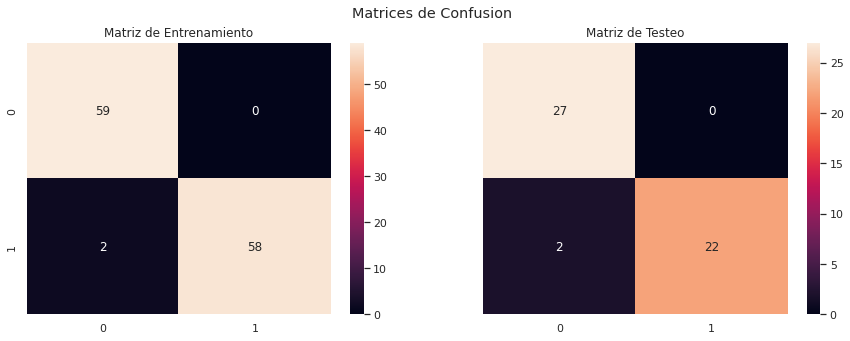

In [89]:
# Grid Search KNN
# Calculo las metricas en Train
train_accuracy_clf = accuracy_score(y_train, y_train_pred_clf)
train_f1_clf = f1_score(y_train, y_train_pred_clf)
train_precision_clf = precision_score(y_train, y_train_pred_clf)
train_recall_clf = recall_score(y_train, y_train_pred_clf)
 
# Calculo las metricas en Test
test_accuracy_clf = accuracy_score(y_test, y_test_pred_clf)
test_f1_clf = f1_score(y_test, y_test_pred_clf)
test_precision_clf = precision_score(y_test, y_test_pred_clf)
test_recall_clf = recall_score(y_test, y_test_pred_clf)
 
 
print('Regresion Logistica: \n',
      'set de entrenamiento:  {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(train_accuracy_clf, train_f1_clf, train_precision_clf, train_recall_clf),
      'set de evaluación:     {} % accuracy, {} % F1, {} % precision, {} % recall \n'.format(test_accuracy_clf, test_f1_clf, test_precision_clf, test_recall_clf))
 
 
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Matrices de Confusion')
 
sns.heatmap(confusion_matrix(y_train, y_train_pred_clf), annot=True, ax=axes[0])
axes[0].set_title("Matriz de Entrenamiento")
 
sns.heatmap(confusion_matrix(y_test, y_test_pred_clf), annot=True, ax=axes[1])
axes[1].set_title("Matriz de Testeo")
plt.show()


## Kfold

In [109]:
from sklearn.model_selection import KFold 

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model_kfold = model_clf
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model_kfold.fit(X_train,y_train)
    pred_values = model_kfold.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Accuracy de cada fold - {}'.format(acc_score))
print('Accuracy promedio : {}'.format(avg_acc_score))


Accuracy de cada fold - [0.8823529411764706, 1.0, 1.0, 1.0, 1.0]
Accuracy promedio : 0.9764705882352942


### Se observa como el accuracy paso de un 0.9607843137254902 a un 0.9764705882352942 con la mejora de parametros y la validacion cruzada